In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
all_df = pd.read_csv('train.csv')

# Split the data into training (70%) and testing (30%) sets
train_df, test_df = train_test_split(all_df, test_size=0.3, random_state=42)

# Display the shapes of the two datasets
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (1022, 81)
Test DataFrame shape: (438, 81)


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

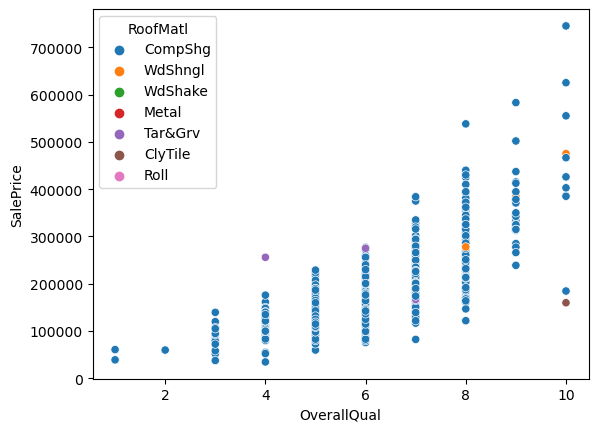

In [3]:
sns.scatterplot(data=train_df, x="OverallQual", y="SalePrice", hue = "RoofMatl")

In [4]:
def getLinearAverageSlope(df, intercept):
    average_Slopes = []
    for i in range(len(df['SalePrice'])):
        slope = (df.iloc[i]['SalePrice'] + intercept) / df.iloc[i]['OverallQual']
        average_Slopes.append(slope)
    return sum(average_Slopes) / len(average_Slopes) 

linearAverageSlope = getLinearAverageSlope(train_df, 0)
print(linearAverageSlope)

28997.643171263946


In [5]:
#Find average relative error

def getLinearPrediction(OverallQual, slope, intercept):
    return slope*OverallQual + intercept

def getPolyPrediction(year, shift, intercept, mult, degree):
    return pow(mult*(year+shift), degree)+intercept

def getRelativeError(prediction, actual):
    return abs(prediction-actual) / actual * 100

def getLinearRMSEAccuracy(df, slope, intercept):
    squared_errors = 0

    for i in range(len(df['SalePrice'])):
        SalePrice = df.iloc[i]['SalePrice']
        OverallQual = df.iloc[i]['OverallQual']
        prediction = getLinearPrediction(OverallQual, slope, intercept)

        # Calculate squared error
        squared_errors += (prediction - SalePrice)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df['SalePrice'])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

def getRMSEAccuracy(df, shift, intercept, mult, degree):
    squared_errors = 0

    for i in range(len(df['SalePrice'])):
        SalePrice = df.iloc[i]['SalePrice']
        OverallQual = df.iloc[i]['OverallQual']
        prediction = getPolyPrediction(OverallQual, shift, intercept, mult, degree)

        # Calculate squared error
        squared_errors += (prediction - SalePrice)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df['SalePrice'])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

   OverallQual           RMSE
0          2.0   16102.728398
1          3.0   18391.677388
2          4.0   28722.551870
3          5.0   30212.694907
4          6.0   35760.048353
5          7.0   45457.140393
6          8.0   75671.587181
7          9.0  165839.818494
8         10.0  206724.174564


<AxesSubplot:xlabel='OverallQual', ylabel='RMSE'>

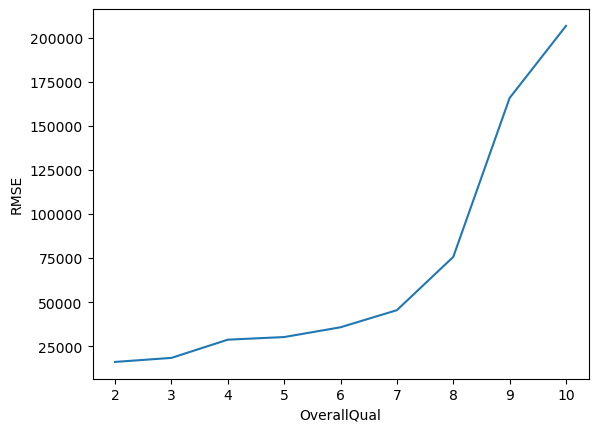

In [6]:
## RMSE Linear Chart
LinearRMSEData = {
    "OverallQual": [],
    "RMSE": []
}
LinearRMSE_df = pd.DataFrame(LinearRMSEData)

# Assuming you have a DataFrame called test_df
for i in range(len(test_df['OverallQual'])):
    OverallQual = test_df.iloc[i]['OverallQual']
    SalePrice = test_df.iloc[i]["SalePrice"]
    prediction = getLinearPrediction(OverallQual, linearAverageSlope, 0)

    # Calculate squared error
    squared_error = (prediction - SalePrice)**2

    # Append the squared error to the LinearRMSE_df DataFrame
    new_row = {'OverallQual': OverallQual, "RMSE": squared_error}
    LinearRMSE_df = pd.concat([LinearRMSE_df, pd.DataFrame([new_row])], ignore_index=True)

# Group by 'OverallQual' and calculate the mean of squared errors
LinearRMSE_df = LinearRMSE_df.groupby('OverallQual')['RMSE'].mean().reset_index()

# Calculate root mean squared error
LinearRMSE_df['RMSE'] = np.sqrt(LinearRMSE_df['RMSE'])

# Display the resulting DataFrame
print(LinearRMSE_df)
sns.lineplot(data=LinearRMSE_df, x="OverallQual", y="RMSE")

   OverallQual           RMSE
0          2.0   49160.326691
1          3.0   91950.876254
2          4.0  108125.210918
3          5.0  116520.336757
4          6.0  106163.481315
5          7.0   73161.324123
6          8.0   93838.723157
7          9.0  335981.751703
8         10.0  936481.648718


<AxesSubplot:xlabel='OverallQual', ylabel='RMSE'>

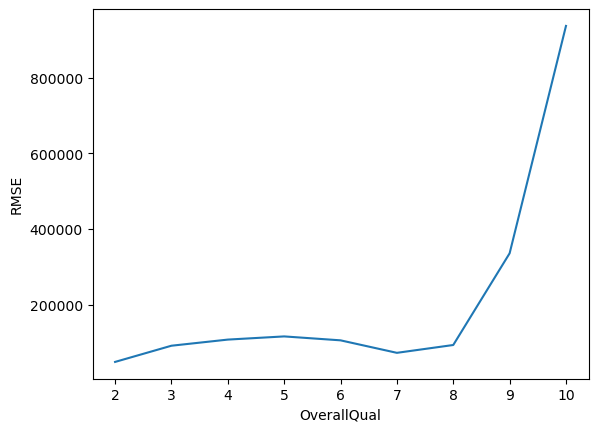

In [7]:
##POLYNOMIIAL REGRESSION RMSE GRAPH
PolyRMSEData = {
    "OverallQual": [],
    "RMSE": []
}
PolyRMSE_df = pd.DataFrame(PolyRMSEData)

# Assuming you have a DataFrame called test_df
for i in range(len(test_df['OverallQual'])):
    OverallQual = test_df.iloc[i]['OverallQual']
    SalePrice = test_df.iloc[i]["SalePrice"]
    prediction = getPolyPrediction(OverallQual, 0, 0, 1, 6.1355)

    # Calculate squared error
    squared_error = (prediction - SalePrice)**2

    # Append the squared error to the PolyRMSE_df DataFrame
    new_row = {'OverallQual': OverallQual, "RMSE": squared_error}
    PolyRMSE_df = pd.concat([PolyRMSE_df, pd.DataFrame([new_row])], ignore_index=True)

# Group by 'OverallQual' and calculate the mean of squared errors
PolyRMSE_df = PolyRMSE_df.groupby('OverallQual')['RMSE'].mean().reset_index()

# Calculate root mean squared error
PolyRMSE_df['RMSE'] = np.sqrt(PolyRMSE_df['RMSE'])

# Display the resulting DataFrame
print(PolyRMSE_df)
sns.lineplot(data=PolyRMSE_df, x="OverallQual", y="RMSE")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

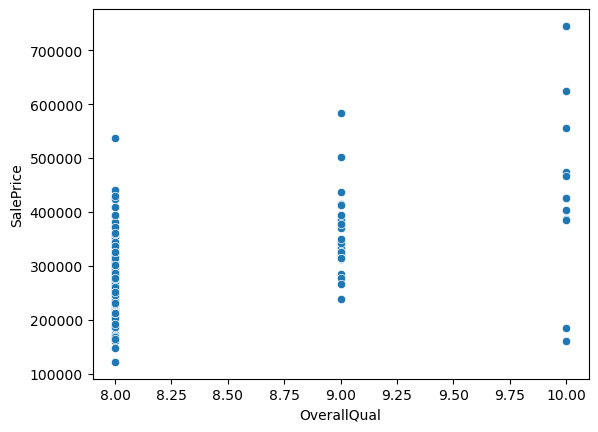

In [8]:
## CHART OF DATAPOINTS WITH OVERALLQUAL >= 8

# Assuming train_df is your DataFrame
qualitySelection_df = train_df[(train_df['OverallQual'] >= 8) & (train_df['OverallQual'] <= 10)]

# Plot the scatter plot for the specified range on the x-axis
sns.scatterplot(data=qualitySelection_df, x="OverallQual", y="SalePrice")

In [9]:
averageSelection_df = pd.DataFrame({
    "OverallQual": [8, 9, 10],
    "SalePrice": [train_df[(train_df['OverallQual'] == 8)]['SalePrice'].mean(), train_df[(train_df['OverallQual'] == 9)]['SalePrice'].mean(), train_df[(train_df['OverallQual'] == 10)]['SalePrice'].mean()]
})

averageSelection_df.to_csv("averageSelection_df.csv")

,Unnamed: 0,OverallQual,SalePrice
0,0,8,274112.188525
1,1,9,355825.366667
2,2,10,437396.454545


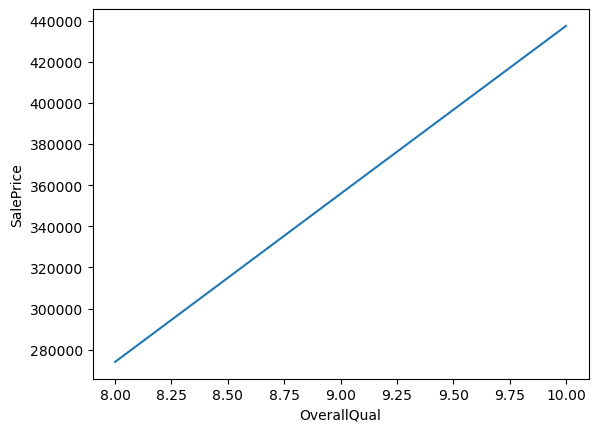

In [10]:
averageSelection_df = pd.read_csv("averageSelection_df.csv")

sns.lineplot(data=averageSelection_df, x = "OverallQual", y="SalePrice")
averageSelection_df

In [11]:
getLinearAverageSlope(qualitySelection_df, 0)

35873.81307089299

In [12]:

getLinearRMSEAccuracy(train_df, linearAverageSlope, 0)

52649.355577365604

In [13]:

getLinearRMSEAccuracy(qualitySelection_df, linearAverageSlope, 0)

101096.49579054116

In [14]:

getLinearRMSEAccuracy(qualitySelection_df, 35873.81307089299, 0)

80692.49421568903

In [15]:
#Slope for OverallQual 8 and higher
selectionAverageSlope = getLinearAverageSlope(qualitySelection_df, 0)

In [16]:
# Slope: 80000, intercept: 280000
getLinearRMSEAccuracy(qualitySelection_df, selectionAverageSlope, 280000)

289722.7791648464

   OverallQual           RMSE
0          8.0   65863.887736
1          9.0   75425.026525
2         10.0  181265.267289


<AxesSubplot:xlabel='OverallQual', ylabel='RMSE'>

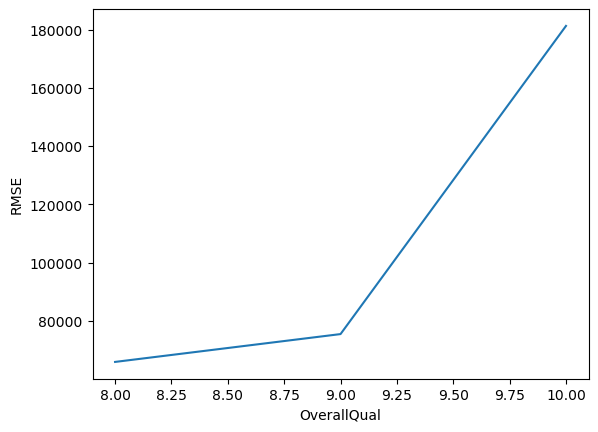

In [17]:
## RMSE Linear Chart
LinearRMSEData = {
    "OverallQual": [],
    "RMSE": []
}
LinearRMSE_df = pd.DataFrame(LinearRMSEData)

# Assuming you have a DataFrame called test_df
for i in range(len(qualitySelection_df['OverallQual'])):
    OverallQual = qualitySelection_df.iloc[i]['OverallQual']
    SalePrice = qualitySelection_df.iloc[i]["SalePrice"]
    prediction = getLinearPrediction(OverallQual, getLinearAverageSlope(qualitySelection_df, 0), 0)

    # Calculate squared error
    squared_error = (prediction - SalePrice)**2

    # Append the squared error to the LinearRMSE_df DataFrame
    new_row = {'OverallQual': OverallQual, "RMSE": squared_error}
    LinearRMSE_df = pd.concat([LinearRMSE_df, pd.DataFrame([new_row])], ignore_index=True)

# Group by 'OverallQual' and calculate the mean of squared errors
LinearRMSE_df = LinearRMSE_df.groupby('OverallQual')['RMSE'].mean().reset_index()

# Calculate root mean squared error
LinearRMSE_df['RMSE'] = np.sqrt(LinearRMSE_df['RMSE'])

# Display the resulting DataFrame
print(LinearRMSE_df)
sns.lineplot(data=LinearRMSE_df, x="OverallQual", y="RMSE")

In [21]:
def getDTPrediction(OverallQual):
    if OverallQual < 8:
        return getLinearPrediction(OverallQual, linearAverageSlope, 0)
    else:
        return getLinearPrediction(OverallQual, selectionAverageSlope, 0)
    
def getDTRMSEAccuracy(df):
    squared_errors = 0

    for i in range(len(df['SalePrice'])):
        SalePrice = df.iloc[i]['SalePrice']
        OverallQual = df.iloc[i]['OverallQual']
        prediction = getDTPrediction(OverallQual)

        # Calculate squared error
        squared_errors += (prediction - SalePrice)**2

    # Calculate mean squared error
    mean_squared_error = squared_errors / len(df['SalePrice'])

    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error)

    return rmse

In [26]:
getDTRMSEAccuracy(train_df)

46694.39221554975

In [31]:
getLinearRMSEAccuracy(train_df, linearAverageSlope, 0)

52649.355577365604

In [28]:
getDTRMSEAccuracy(test_df)

48487.53535328189

In [30]:
getLinearRMSEAccuracy(test_df, linearAverageSlope, 0)

56376.40425412138

In [ ]:
# I previously mentioned Root Mean Squared Error values that were calculated for calculating the accuracy on the training

# dataframe, and it was previously argued other models like decision tree will overfit the data. So, if we compare our accuracy

# to our test dataframe, we get a decision tree RMSE value of 48 thousand, 487. Meanwhile the single linear regression model 

# gets a higher value of 56 thousand, 376. Through these values, we can conclude the same difference that decision tree provides'

# a lower RMSE value and thus a greater accuracy than a single linear regression model. This also concludes that the decision

# tree regression model did not overfit. As for the numbers calculated for the decision tree regression model that the other

# team argued, I would've liked to have heard how they formulated their model that gave a worse accuracy.